# Hands-ON Machine Learning with Scikit-Learn and Tensorflow (2.0)
## Chapter 10 - Introduction to Artificial Neural Networks

---

Real (Biological) vs. Artificial Neurons

![Anatomy of a multipolar neuron](images/Blausen_0657_MultipolarNeuron.png)

_[Wikipedia - Neural Circuit](https://en.wikipedia.org/wiki/Neural_circuit)_


![An Artificial Neural Network](images/neural_network.png)

_[Wikipedia - Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)_

Biological

![Neuron's in a mouse's visual cortex](images/mouse_neurons.gif)

_[Brain’s Visual Circuitry](https://sciencebeta.com/visual-circuitry-first-sights/)_

Artificial

![Identify Digits](images/artificial-neural-network.gif)

Whats the big deal?

_A logical calculus of the ideas immanent in nervous activity - Warren S. McCulloch & Walter Pitts_

---

## Perceptrons

https://en.wikipedia.org/wiki/Perceptron


>In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.[1] It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. 

From the book:

<img src="images/perceptron.png" width=400/>

---

Recommended by the book: https://playground.tensorflow.org for tinkering with neural networks

---

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.datasets import load_iris

tf.keras.backend.clear_session()  # For easy reset of notebook state.
tf.keras.backend.set_floatx('float64') # For preventing cast warning due to new TF behavior

In [63]:
tf.__version__

'2.1.0'

In [64]:
# To check if you have gpu and it's available for use:
tf.config.list_physical_devices('GPU')

[]

In [65]:
plt.style.use('ggplot')

### Working with the Iris Dataset

In [66]:
iris = load_iris()

In [67]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [68]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [69]:
iris['data'][:10] # these are our features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [70]:
iris['feature_names'] # these describe our features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
np.unique(iris['target']) # These are the labels

array([0, 1, 2])

In [72]:
np.unique(iris['target_names']) # These are the human-readable labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Cleaning the feature names**

In [73]:
def clean_name(name: str) -> str:
    return name.replace(" (cm)", "").replace(" ", "_")

In [74]:
clean_feature_names = list(map(clean_name, iris['feature_names']))
clean_feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

**Readable Labels**

In [75]:
iris_labels = iris['target']
set(iris_labels)

{0, 1, 2}

In [76]:
target_names = iris['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
zipped_labels = list(zip(target_names, set(iris_labels)))
label_to_name = {label: name for (name, label) in zipped_labels}
name_to_label = {name: label for (name, label) in zipped_labels}

In [78]:
label_to_name

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [79]:
name_to_label

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [80]:
readable_labels = np.array(list(map(lambda l: label_to_name[l], iris_labels)))
np.random.choice(readable_labels, 10)

array(['setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa'], dtype='<U10')

**Encode the labels: str -> int**

_Why should the labels be encoded?_

_Should the labels be strings or numbers or something else?_

In [81]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [82]:
onehot_labels = np.array([np.eye(3)[ix] for ix in iris_labels])
random_ix = np.random.choice(range(len(iris_labels)), 5)
list(zip(onehot_labels[random_ix], readable_labels[random_ix]))

[(array([0., 1., 0.]), 'versicolor'),
 (array([0., 1., 0.]), 'versicolor'),
 (array([0., 1., 0.]), 'versicolor'),
 (array([0., 0., 1.]), 'virginica'),
 (array([1., 0., 0.]), 'setosa')]

**Data**

_Features_

In [83]:
iris_data = iris['data']
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

_Labels_

In [84]:
onehot_labels[random_ix]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

---

### Splitting Data for training and testing

In [85]:
N = len(iris_labels)

In [86]:
test_size = 0.2
test_size = round(N * test_size)
test_size

30

#### Create Test and Training Indicies

In [87]:
ixs = range(N)
test_ix = np.random.choice(ixs, test_size, replace=False)
train_ix = np.array(list(filter(lambda i: i not in test_ix, ixs)))
np.random.shuffle(train_ix)

In [88]:
train_data, train_labels = iris_data[train_ix], onehot_labels[train_ix]
test_data, test_labels = iris_data[test_ix], onehot_labels[test_ix]

In [89]:
train_data[:5]

array([[6.9, 3.2, 5.7, 2.3],
       [5. , 3.4, 1.6, 0.4],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.8, 5.6, 2.1],
       [6.7, 3.1, 4.4, 1.4]])

In [90]:
train_labels[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [91]:
train_data.shape, train_labels.shape

((120, 4), (120, 3))

In [92]:
test_data.shape, test_labels.shape

((30, 4), (30, 3))

_There's also sklearn's `train_test_split`_

In [93]:
# from sklearn.model_selection import train_test_split
# help(train_test_split)

---

## Basic Perceptron in Tensorflow

## Creating the model - Tensorflow and Keras

In [94]:
iris_perceptron = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [95]:
iris_perceptron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [96]:
# help(tf.keras.models.Sequential)

In [97]:
# help(tf.keras.layers.Dense)

In [98]:
iris_perceptron.compile(optimizer='sgd',
                        loss='mse',
                        metrics=['categorical_accuracy'])

In [99]:
# help(iris_perceptron.compile)

_Remember sklearn's `model.fit`?_

In [100]:
history = iris_perceptron.fit(x=train_data,                           
                              y=train_labels,
                              batch_size=1,
                              epochs=10)

Train on 120 samples
Epoch 1/10
120/120 [==============================] - 1s 9ms/sample - loss: 0.2118 - categorical_accuracy: 0.5167
Epoch 2/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1577 - categorical_accuracy: 0.6833
Epoch 3/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1369 - categorical_accuracy: 0.6833
Epoch 4/10
120/120 [==============================] - 0s 4ms/sample - loss: 0.1229 - categorical_accuracy: 0.7167
Epoch 5/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1073 - categorical_accuracy: 0.7750
Epoch 6/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1052 - categorical_accuracy: 0.7750
Epoch 7/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0954 - categorical_accuracy: 0.8083
Epoch 8/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0886 - categorical_accuracy: 0.8333
Epoch 9/10
120/120 [==============================] - 0s 3ms/sample

In [101]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [102]:
type(history.history)

dict

In [103]:
history.history

{'loss': [0.21176921123017867,
  0.15770301191757122,
  0.13690234993894895,
  0.12290669777430593,
  0.10725204963237048,
  0.10518182396190241,
  0.09538431505595023,
  0.08856424658248822,
  0.08677854184643366,
  0.08072787830121039],
 'categorical_accuracy': [0.5166666666666667,
  0.6833333333333333,
  0.6833333333333333,
  0.7166666666666667,
  0.775,
  0.775,
  0.8083333333333333,
  0.8333333333333334,
  0.85,
  0.85]}

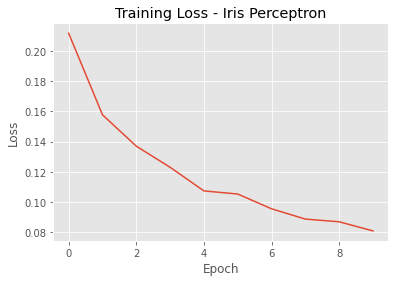

In [104]:
plt.plot(history.epoch, history.history['loss'])
plt.title("Training Loss - Iris Perceptron")
plt.xlabel('Epoch')
plt.ylabel('Loss')
None

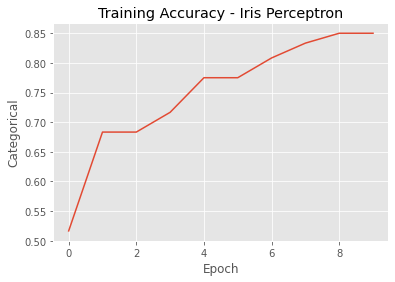

In [105]:
plt.plot(history.epoch, history.history['categorical_accuracy'])
plt.title("Training Accuracy - Iris Perceptron")
plt.xlabel('Epoch')
plt.ylabel('Categorical')
None

In [106]:
loss, accuracy = iris_perceptron.evaluate(x=test_data, 
                                          y=test_labels, 
                                          verbose=1)
loss, accuracy

30/30 [==============================] - 0s 5ms/sample - loss: 0.0710 - categorical_accuracy: 0.9333


(0.07098465808667243, 0.9333333333333333)

### Perceptrons can also have more than a single layer - Multilayer Perceptrons

In [107]:
iris_multilayer_perceptron = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

iris_multilayer_perceptron.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 12,867
Trainable params: 12,867
Non-trainable params: 0
_________________________________________________________________


In [108]:
iris_multilayer_perceptron.compile(optimizer='sgd',
                                   loss='mse',
                                   metrics=['categorical_accuracy'])

history = iris_multilayer_perceptron.fit(x=train_data,                       
                                         y=train_labels,
                                         batch_size=1,
                                         epochs=10)

Train on 120 samples
Epoch 1/10
120/120 [==============================] - 1s 8ms/sample - loss: 0.2213 - categorical_accuracy: 0.4333
Epoch 2/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1935 - categorical_accuracy: 0.6333
Epoch 3/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1686 - categorical_accuracy: 0.7167
Epoch 4/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1461 - categorical_accuracy: 0.6917
Epoch 5/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1241 - categorical_accuracy: 0.7667
Epoch 6/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1109 - categorical_accuracy: 0.7750
Epoch 7/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0967 - categorical_accuracy: 0.8083
Epoch 8/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0915 - categorical_accuracy: 0.8500
Epoch 9/10
120/120 [==============================] - 0s 3ms/sample

In [109]:
_ = iris_multilayer_perceptron.evaluate(x=test_data,
                                        y=test_labels,
                                        verbose=1)

30/30 [==============================] - 0s 5ms/sample - loss: 0.0778 - categorical_accuracy: 0.8333


---

In [110]:
class IrisPerceptron(tf.keras.Model):
    def __init__(self):
        tf.keras.Model.__init__(self)
        # Inputs -> 4 features per sample
        self.input_layer = tf.keras.layers.Dense(64, activation='relu', input_shape=(4,1))
        self.hidden1 = tf.keras.layers.Dense(128, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(32, activation='relu')
        # Expect 3 classes to classify
        self.output_layer = tf.keras.layers.Dense(3, activation='softmax')
    
    def call(self, input_data):
        x = self.input_layer(input_data)
        x = self.hidden1(x)
        x = self.hidden2(x)
        output = self.output_layer(x)
        return output

In [111]:
iris_perceptron = IrisPerceptron()

In [112]:
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD()

In [113]:
iris_perceptron.compile(loss=loss_object,
                        optimizer=optimizer,
                        metrics=['accuracy'])

In [114]:
history = iris_perceptron.fit(train_data,
                              train_labels,
                              batch_size=1,
                              epochs=10)

Train on 120 samples
Epoch 1/10
120/120 [==============================] - 1s 7ms/sample - loss: 0.2124 - accuracy: 0.4500
Epoch 2/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1646 - accuracy: 0.7250
Epoch 3/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1303 - accuracy: 0.7167
Epoch 4/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.1093 - accuracy: 0.8000
Epoch 5/10
120/120 [==============================] - 0s 4ms/sample - loss: 0.1027 - accuracy: 0.7750
Epoch 6/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0925 - accuracy: 0.8000
Epoch 7/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0844 - accuracy: 0.8500
Epoch 8/10
120/120 [==============================] - 0s 4ms/sample - loss: 0.0753 - accuracy: 0.8750
Epoch 9/10
120/120 [==============================] - 0s 3ms/sample - loss: 0.0718 - accuracy: 0.8667
Epoch 10/10
120/120 [==============================] - 1s 4ms

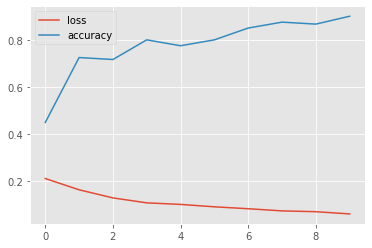

In [115]:
pd.DataFrame(history.history).plot()

In [116]:
iris_perceptron.evaluate(test_data, test_labels)

30/30 [==============================] - 0s 6ms/sample - loss: 0.0745 - accuracy: 0.8333


[0.07447367519683515, 0.8333333333333334]

### Or train with `@tf.function` decorator

In [117]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [118]:
@tf.function
def train_step(model, data, labels):
    global loss_object
    global optimizer
    with tf.GradientTape() as tape:
        predictions = model(data, training=True)
        loss = loss_object(labels, predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss.update_state(loss)
    train_accuracy.update_state(labels, predictions)

In [119]:
@tf.function
def test_step(model, data, labels):
    global loss_object
    global optimizer
    predictions = model(data, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [120]:
iris_perceptron = IrisPerceptron()

In [121]:
train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).shuffle(10000).batch(1)

test_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(1)

In [122]:
EPOCHS = 10

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    train_ix = np.arange(len(train_data))
    test_ix = np.arange(len(test_data))
    np.random.shuffle(train_ix)
    np.random.shuffle(test_ix)
    
    
    for data, labels in train_ds:
        train_step(iris_perceptron, data, labels)

    for data, labels in test_ds:
        test_step(iris_perceptron, data, labels)
        

    report = [
        '============================================',
        f'Epoch {epoch+1}',
        f'     Loss:          {train_loss.result():.3f},',
        f'     Accuracy:      {train_accuracy.result():.3%},',
        f'     Test Loss:     {test_loss.result():.3f},',
        f'     Test Accuracy: {test_accuracy.result():.3%}'
    ]
    report = "\n".join(report)
    print(report)

Epoch 1
     Loss:          0.195,
     Accuracy:      54.167%,
     Test Loss:     0.181,
     Test Accuracy: 60.000%
Epoch 2
     Loss:          0.168,
     Accuracy:      69.167%,
     Test Loss:     0.145,
     Test Accuracy: 73.333%
Epoch 3
     Loss:          0.144,
     Accuracy:      76.667%,
     Test Loss:     0.125,
     Test Accuracy: 100.000%
Epoch 4
     Loss:          0.121,
     Accuracy:      81.667%,
     Test Loss:     0.099,
     Test Accuracy: 96.667%
Epoch 5
     Loss:          0.103,
     Accuracy:      85.833%,
     Test Loss:     0.082,
     Test Accuracy: 86.667%
Epoch 6
     Loss:          0.089,
     Accuracy:      88.333%,
     Test Loss:     0.068,
     Test Accuracy: 90.000%
Epoch 7
     Loss:          0.078,
     Accuracy:      90.833%,
     Test Loss:     0.058,
     Test Accuracy: 100.000%
Epoch 8
     Loss:          0.065,
     Accuracy:      91.667%,
     Test Loss:     0.051,
     Test Accuracy: 90.000%
Epoch 9
     Loss:          0.061,
     Accura

---